<a href="https://colab.research.google.com/github/oliviachchoi/SDproject-bike-/blob/main/seoul_bike.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

서울시 따릉이 데이터 분석

https://brunch.co.kr/@bdh/38

https://glasvase.tistory.com/29

https://journal.cartography.or.kr/articles/pdf/DG7Q/kca-2020-020-01-7.pdf

https://dailyheumsi.tistory.com/87?category=801880

In [ ]:
#idea1
#시간대 별로 분석해서 각 거치소의 따릉이 갯수 예측 => Time Series, Forecasting 등등
#각 구의 따릉이 대여/ 반납 예측

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
#2021년 1월 31일 기준 따릉이 대여소 정보

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/따릉이 project/공공자전거 대여소 정보(21.01.31 기준) (1).csv',encoding='cp949',skiprows=5,header=None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [ ]:
#컬럼 명 지정해주기
df= df.rename(columns= {0: 'stno', 1: 'stname',2: 'place',3:'detailedplace',4:'Lat',5:'Long',6:'Time',7:'LCD',8:'QR',9:'method'})

In [ ]:
df.head()

,stno,stname,place,detailedplace,Lat,Long,Time,LCD,QR,method
0,301.0,경복궁역 7번출구 앞,종로구,서울특별시 종로구 사직로 지하130,37.575794,126.971451,2015-10-07,16.0,NaN,LCD
1,302.0,경복궁역 4번출구 뒤,종로구,서울특별시 종로구 사직로 지하130,37.575947,126.974060,2015-10-07,12.0,NaN,LCD
2,303.0,광화문역 1번출구 앞,종로구,서울특별시 종로구 세종대로 지하189,37.571770,126.974663,2015-10-07,8.0,NaN,LCD
3,304.0,광화문역 2번출구 앞,종로구,서울특별시 종로구 세종대로 지하172,37.572113,126.977577,2021-01-26,NaN,7.0,QR
4,305.0,종로구청 옆,종로구,서울특별시 종로구 삼봉로 43,37.572582,126.978355,2015-10-07,16.0,NaN,LCD


In [ ]:
df.isna().sum()

stno                3
stname              3
place               3
detailedplace       3
Lat               115
Long              115
Time                5
LCD               675
QR               1486
method              3
dtype: int64

In [ ]:
df.tail(3)

,stno,stname,place,detailedplace,Lat,Long,Time,LCD,QR,method
2154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2156,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#마지막 3행은 Nan값이니까 drop
df=df[df.stno.isna()==False]

In [ ]:
df.isna().sum()

stno                0
stname              0
place               0
detailedplace       0
Lat               112
Long              112
Time                2
LCD               672
QR               1483
method              0
dtype: int64

In [ ]:
df[df.Lat.isna()]
#좌표를 찍으려고 했는데 nan값이 너무 많을 땐 어떻게 해야하지?
#geocode/카카오 api 사용해서 일일이 lat long 넣어줘야하나?

,stno,stname,place,detailedplace,Lat,Long,Time,LCD,QR,method
65,486.0,평창동주민센터 앞,종로구,서울특별시 종로구 평창동 187-2,NaN,NaN,2020-03-11,5.0,NaN,LCD
79,3415.0,동대문역6번출구,종로구,창신동487-5,NaN,NaN,2020-02-26,NaN,15.0,QR
96,4702.0,"평창동 꽃여울(꽃집),스타벅스 앞",종로구,평창12길 3,NaN,NaN,2020-07-21,NaN,5.0,QR
97,4710.0,자교교회 앞,종로구,자하문로 58,NaN,NaN,2020-11-05,NaN,8.0,QR
98,4711.0,올림픽기념 국민생활관 로터리,종로구,종로구 혜화동 9-8,NaN,NaN,2020-09-10,NaN,10.0,QR
...,...,...,...,...,...,...,...,...,...,...
1818,2550.0,양재동 꽃시장 건너편,서초구,양재동 351,NaN,NaN,2020-06-15,NaN,10.0,QR
1990,1267.0,올림픽공원 남2문 앞,송파구,서울특별시 송파구 올림픽로 424,NaN,NaN,2020-06-25,NaN,15.0,QR
1991,1268.0,몽촌토성역 1번출구 옆,송파구,서울특별시 송파구 방이동 88-21,NaN,NaN,2020-06-25,NaN,15.0,QR
2068,2658.0,가락몰 업무동,송파구,가락동 600,NaN,NaN,2020-06-04,NaN,10.0,QR


In [ ]:
#우선 구 데이터는 결측치가 없기 때문에 구 위주로 시각화 먼저 해준다. 
df.place.value_counts()

강서구     152
송파구     133
서초구     122
강남구     118
영등포구    108
마포구     102
종로구      99
구로구      91
노원구      88
강동구      84
동대문구     82
성동구      81
양천구      81
은평구      80
중구       76
서대문구     74
광진구      74
성북구      73
중랑구      70
용산구      67
관악구      66
동작구      62
강북구      59
도봉구      57
금천구      55
Name: place, dtype: int64

In [ ]:
#한글 폰트 깨질 때 방법
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


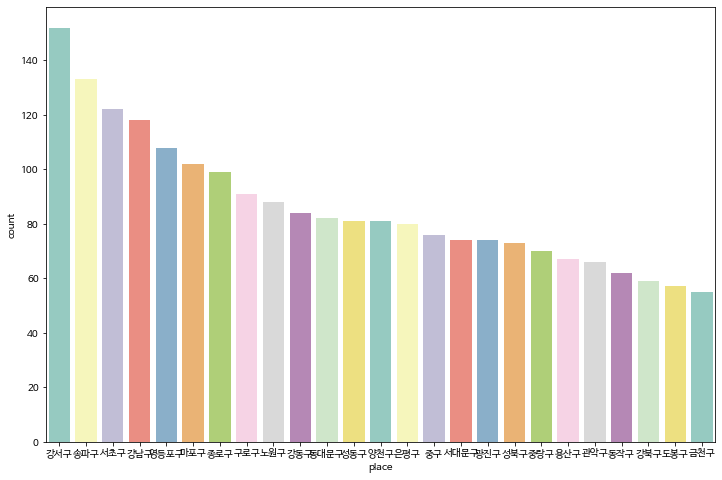

In [ ]:
plt.figure(figsize=(12,8))
sns.countplot(df.place,order=df['place'].value_counts().index,palette='Set3')
#강서구, 송파구, 서초구, 강남구, 영등포구 순으로 거치대가 많은 것을 볼 수 있다
#상권의 밀집도, 출/퇴근 시간의 밀집도와 연관이 있을 까?

In [ ]:
강서구     152
송파구     133
서초구     122
강남구     118
영등포구    108
마포구     102
종로구      99
구로구      91
노원구      88
강동구      84
동대문구     82
성동구      81
양천구      81
은평구      80
중구       76
서대문구     74
광진구      74
성북구      73
중랑구      70
용산구      67
관악구      66
동작구      62
강북구      59
도봉구      57
금천구      55

In [ ]:
list_gu= [('강서구','152'),('송파구','133'),('서초구','122'),('강남구','118'),('영등포구','108' )
,('마포구','102' ), ('종로구','99' ),('구로구','91' ), ('노원구','88'), ('강동구','84' ), ('동대문구','82' ), ('성동구','81' ),
('양천구','81' ), ('은평구','80' ), ('중구','76' ), ('서대문구','74' ), ('광진구','74' ), ('성북구','73' ), ('중랑구','70' ), ('용산구','67' ),
('관악구','66' ), ('동작구','62' ), ('강북구','59' ), ('도봉구','57'), ('금천구','55')]

In [ ]:
gu= pd.DataFrame(list_gu, columns=['구','거치대수'])
gu['거치대수']= gu['거치대수'].astype('int')

In [ ]:
gu

,구,거치대수
0,강서구,152
1,송파구,133
2,서초구,122
3,강남구,118
4,영등포구,108
5,마포구,102
6,종로구,99
7,구로구,91
8,노원구,88
9,강동구,84
